In [ ]:
# Importing necessary libraries to read and handle WRF output files
import xarray as xr
from glob import glob

In [95]:
#  Getting a sorted list of WRF output files
files = sorted(glob("./wrf_outputs/wrfout_d01_*"))

In [ ]:
#  Opening and concatenating WRF output files along the Time dimension
datsets = [xr.open_dataset(f) for f in files]
ds = xr.concat(datsets, dim="Time")

In [ ]:
# Extracting specific variables from the dataset
t2 = ds["T2"] - 273.15  # Converting temperature from Kelvin to Celsius 
t2.attrs["units"] = "Celsius"

rain = ds["RAINNC"]  # Total accumulated rainfall
rain.attrs["units"] = "mm"

u10 = ds["U10"]  # 10-meter wind speed x-component
u10.attrs["units"] = "m/s"


v10 = ds["V10"]  # 10-meter wind speed y-component
v10.attrs["units"] = "m/s"


In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [ ]:
temp = t2.isel(Time=0)

NameError: name 'temp' is not defined

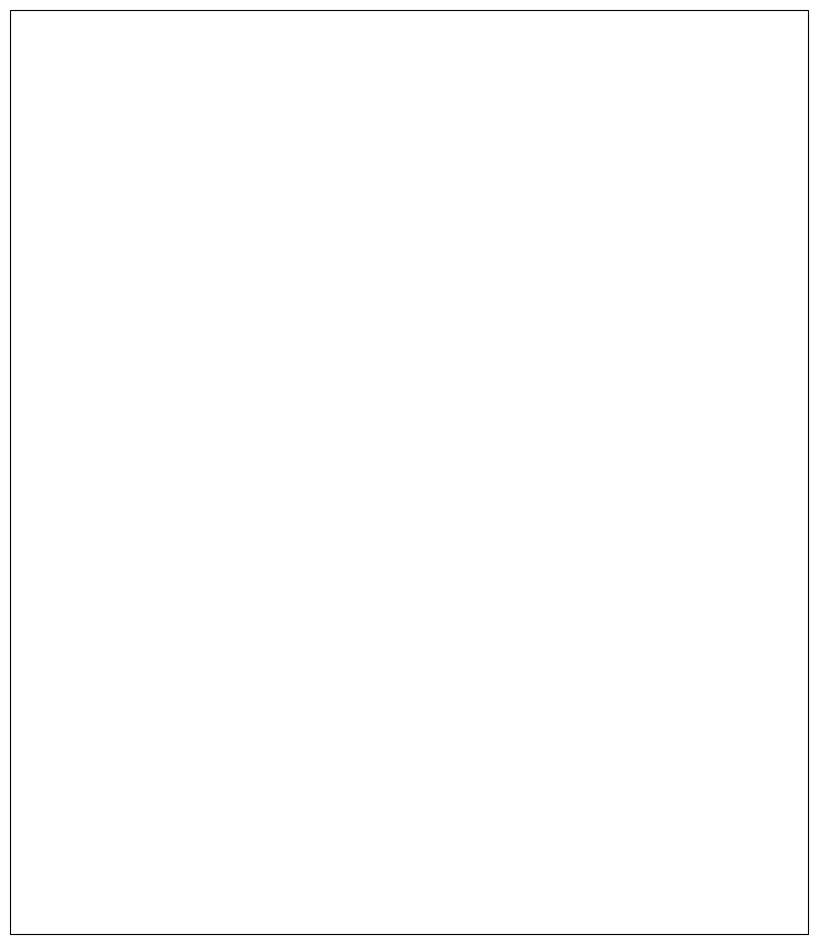

In [ ]:
fig = plt.figure(figsize=(20, 12))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([33, 42.5, -5.5, 5.5], crs=ccrs.PlateCarree())

cf = ax.contourf(
    # temp["XLONG"],
    # temp["XLAT"],
    temp,
    levels=20,
    cmap="coolwarm",
    transform=ccrs.PlateCarree(),
)

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='-')
ax.add_feature(cfeature.LAKES, alpha=0.5, edgecolor='blue', facecolor='blue')
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)

plt.show()